#IMPORTING LIBRARIES

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DATA LOADING AND PREPROCESSING

In [2]:
#Loading the data
from google.colab import files

data = files.upload()

Saving Real Estate Asset Management Data_Migrated Data.csv to Real Estate Asset Management Data_Migrated Data.csv


In [3]:
#Loading the data to dataframe
df = pd.read_csv("Real Estate Asset Management Data_Migrated Data.csv")

In [4]:
#Show top 5 rows
df.head()

,Asset Manager,Prop ID,Property Name,Property Type,Average Occupancy %,GLA Sq Ft,Gross Value,Occupied SqFt,Vacant Sq Ft
0,James Wheeler,AA048,Dovetail,Industrial,100.0%,274821,5782021.54,274821,0
1,James Wheeler,AA048,Dovetail,Industrial,0.0%,42403,9020265.50,0,42403
2,James Wheeler,AA048,Dovetail,Industrial,0.0%,144500,9020265.50,0,144500
3,James Wheeler,AA048,Dovetail,Industrial,100.0%,75365,9020265.50,75365,0
4,James Wheeler,AA048,Dovetail,Industrial,100.0%,508171,23839170.28,508171,0


In [5]:
df.shape

(1499, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asset Manager        1499 non-null   object 
 1   Prop ID              1499 non-null   object 
 2   Property Name        1499 non-null   object 
 3   Property Type        1499 non-null   object 
 4   Average Occupancy %  1499 non-null   object 
 5   GLA Sq Ft            1499 non-null   int64  
 6   Gross Value          1499 non-null   float64
 7   Occupied SqFt        1499 non-null   int64  
 8   Vacant Sq Ft         1499 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 105.5+ KB


In [7]:
df.isnull().sum()

Asset Manager          0
Prop ID                0
Property Name          0
Property Type          0
Average Occupancy %    0
GLA Sq Ft              0
Gross Value            0
Occupied SqFt          0
Vacant Sq Ft           0
dtype: int64


*   The data set has 9 columns and 1499 entries
*   Also it has no missing values



#DATA PREPARATION

#DATA UNDERSTANDING


In [8]:
#Unique values of Assset Manager column
df['Asset Manager'].value_counts()

Asset Manager
Jean Ramos          288
James Wheeler       183
Christine Bowman    177
Ruby Gutierrez      173
Sara Sanchez        164
Eric Jones          133
Nancy Gardner        77
Mildred Jenkins      76
Sharon Smith         76
Kathleen Powell      74
Walter Gordon        64
Juan Matthews        14
Name: count, dtype: int64

In [9]:
#Unique values of Property Type column
df['Property Type'].value_counts()

Property Type
Office        978
Retail        300
Industrial    221
Name: count, dtype: int64

In [10]:
#Encoding the Average Occupancy column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Average Occupancy %']=label_encoder.fit_transform(df['Average Occupancy %'])
print(df ['Average Occupancy %'].unique())

[1 0]


In [11]:
df['Average Occupancy %'].value_counts()

Average Occupancy %
1    1237
0     262
Name: count, dtype: int64

100% has been encoded by one while 0% has been encoded as 0

In [12]:
df.describe()

,Average Occupancy %,GLA Sq Ft,Gross Value,Occupied SqFt,Vacant Sq Ft
count,1499.000000,1499.000000,1.499000e+03,1499.000000,1499.000000
mean,0.825217,10260.846564,7.364118e+07,9010.018679,1250.827885
std,0.379908,32822.794543,7.264650e+07,31968.108873,8827.846202
min,0.000000,-846.000000,-6.725828e+06,-846.000000,-121.000000
25%,1.000000,1600.000000,3.075674e+07,700.000000,0.000000
50%,1.000000,3500.000000,6.555136e+07,2605.000000,0.000000
75%,1.000000,8748.000000,9.221877e+07,7390.500000,0.000000
max,1.000000,753170.000000,3.952922e+08,753170.000000,179337.000000


In [13]:
#Identify numerical Columns
nums_cols= df.select_dtypes(include=np.number).columns
nums_cols

Index(['Average Occupancy %', 'GLA Sq Ft', 'Gross Value', 'Occupied SqFt',
       'Vacant Sq Ft'],
      dtype='object')

In [14]:
#Identify categorical columns
cat_cols= df.select_dtypes(include='object').columns
cat_cols

Index(['Asset Manager', 'Prop ID', 'Property Name', 'Property Type'], dtype='object')


*   From here we understand that under the asset manager we have a total of 12 assets manager with Jean Ramos have a high number of portfolio of properties.              
*   We also find out that we have three property types in our portfolio.They include Office,Retail and Industrial.
*   Our Numerical Columns Included:'GLA Sq Ft', 'Gross Value', 'Occupied SqFt','Vacant Sq Ft'
*   The categorical columns included : 'Asset Manager', 'Prop ID', 'Property Name', 'Property Type'
*   The Average Occupany% comprises of two unique values 100%(1237 count) and 0%(262)%, which was later encoded into numeric values using Label Encoding.





# EXPLORATORY DATA ANALYSIS

#OCCUPANCY ANALYSIS


In [22]:
print(df.groupby('Property Type')['Occupied SqFt'].mean().sort_values(ascending=False))

Property Type
Industrial    31330.488688
Retail         5354.723333
Office         5087.487730
Name: Occupied SqFt, dtype: float64


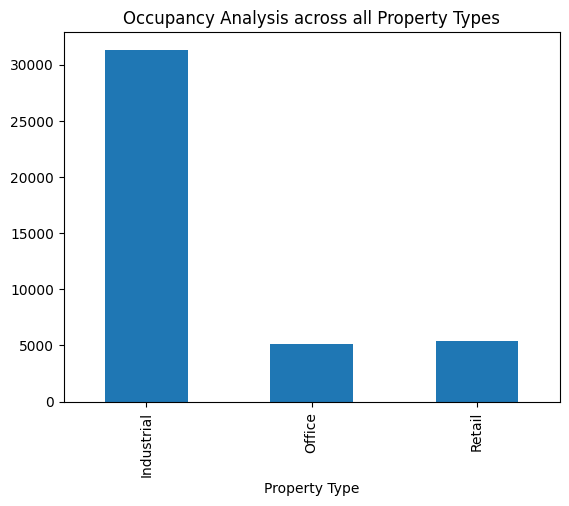

In [23]:
df.groupby('Property Type')['Occupied SqFt'].mean().plot(kind='bar')
plt.title('Occupancy Analysis across all Property Types')
plt.savefig('Occupancy Analysis across all Property Types.png')

Industrial Properties have the highest occupied sqft while Office Properties have the lowest

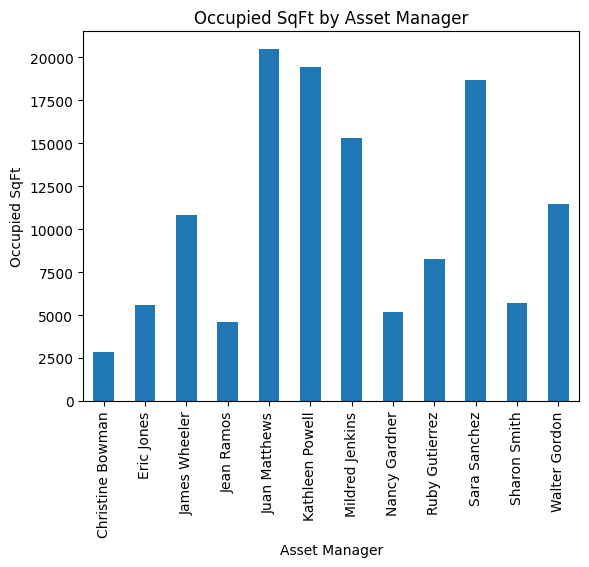

<Figure size 640x480 with 0 Axes>

In [24]:
#Finding out how asset manager affects the at the total square footage occupied by tenants
df.groupby('Asset Manager')['Occupied SqFt'].mean().plot(kind='bar')
plt.title('Occupied SqFt by Asset Manager')
plt.ylabel('Occupied SqFt')
plt.show()
plt.savefig('Occupied SqFt by Asset Manager.png')

Properties managed by Juan Matthews have a high occupied sq ft followed closely by Kathleen Powell, while  Christine Bowman has the lowest occupied sq ft.

<Axes: xlabel='Property Type'>

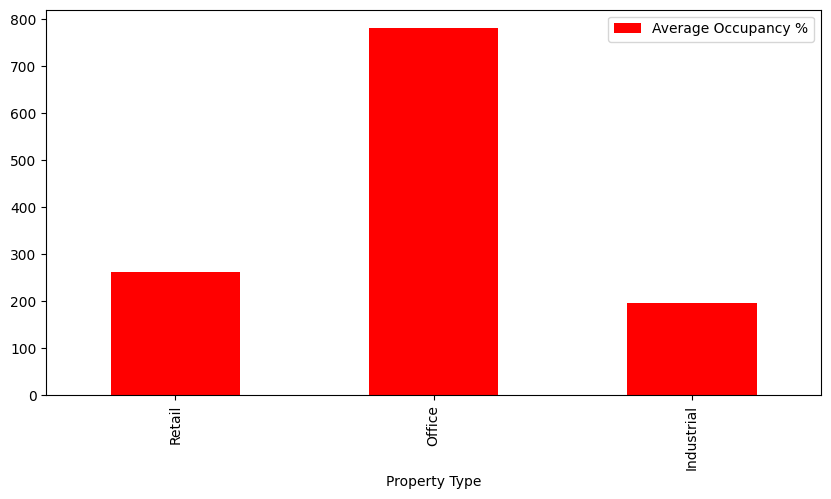

In [25]:
#Identify occcupancy trends by property type
Occupancy = df[['Property Type','Average Occupancy %']]
Occupancy  = Occupancy [df['Average Occupancy %'] >= 0]
Occupancy_trend = Occupancy.groupby('Property Type')['Average Occupancy %'].sum().reset_index()
Occupancy_trend = Occupancy_trend.sort_values(by = 'Property Type', ascending = False).reset_index(drop=True).head(10)
Occupancy_trend.plot(x = 'Property Type', y = 'Average Occupancy %', kind = 'bar', color = 'red', figsize = (10, 5))

In [26]:
Occupancy_trend = Occupancy.groupby('Property Type')['Average Occupancy %'].sum().reset_index()
print(Occupancy_trend)

  Property Type  Average Occupancy %
0    Industrial                  195
1        Office                  781
2        Retail                  261


Industrial properties have a high occupancy rate  while retail properties have a low occupancy rate.

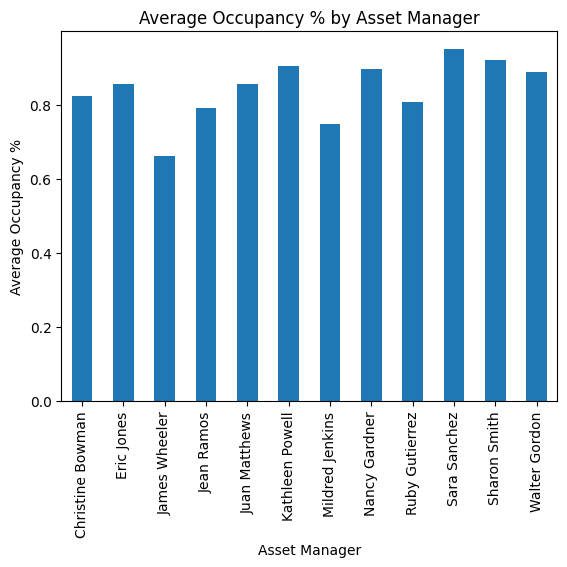

<Figure size 640x480 with 0 Axes>

In [27]:
# Bar chart of average occupancy percentage by asset manager
df.groupby('Asset Manager')['Average Occupancy %'].mean().plot(kind='bar')
plt.title('Average Occupancy % by Asset Manager')
plt.xlabel('Asset Manager')
plt.ylabel('Average Occupancy %')
plt.show()
plt.savefig('Average Occupancy Percentage by Asset Manager.png')

In [28]:
print(df.groupby('Asset Manager')['Average Occupancy %'].mean().sort_values(ascending=False))

Asset Manager
Sara Sanchez        0.951220
Sharon Smith        0.921053
Kathleen Powell     0.905405
Nancy Gardner       0.896104
Walter Gordon       0.890625
Eric Jones          0.857143
Juan Matthews       0.857143
Christine Bowman    0.824859
Ruby Gutierrez      0.809249
Jean Ramos          0.791667
Mildred Jenkins     0.750000
James Wheeler       0.661202
Name: Average Occupancy %, dtype: float64


Sara Sanchez properties have high occupancy rates, closely followed by Sharon Smith while James Wheeeler has the lowest occupany rate.

In [29]:
print(df.groupby('Property Type')['Vacant Sq Ft'].count().sort_values(ascending=False))

Property Type
Office        978
Retail        300
Industrial    221
Name: Vacant Sq Ft, dtype: int64


Office properties have a more vacant spaces wjile Industrial Properties have less vacant spaces.

###Occupancy Analysis for Office Properties

In [30]:
#Creating a dataframe for Office Properties
Office_Property = df[df["Property Type"] == 'Office']  # Slicing the all columns of Property Row
Office_Property.head()

,Asset Manager,Prop ID,Property Name,Property Type,Average Occupancy %,GLA Sq Ft,Gross Value,Occupied SqFt,Vacant Sq Ft
221,Christine Bowman,AA030,Anderson,Office,1,36192,1625270.22,36192,0
222,Christine Bowman,AA028,Armistice,Office,1,-55,49331260.59,-55,0
223,Christine Bowman,AA028,Armistice,Office,1,-50,49331260.59,-50,0
224,Christine Bowman,AA028,Armistice,Office,1,-46,49331260.59,-46,0
225,Christine Bowman,AA028,Armistice,Office,1,-27,49331260.59,-27,0


In [31]:
print(Office_Property.groupby('Property Name')['Occupied SqFt'].sum().sort_values(ascending=False))

Property Name
Old Shore      407415
Hoffman        311240
Randy          305586
Kensington     296042
Morrow         291192
Hayes          280158
Sommers        279267
Kingsford      274606
Brentwood      214644
Becker         184222
Dawn           183833
Northland      181519
Armistice      170407
Rockefeller    167986
Straubel       156689
Green          151033
Huxley         135332
Westridge      130818
Rusk           118379
Packers        116542
Atwood         114546
Artisan         99869
Bayside         94556
Stephen         93305
Reindahl        83781
Autumn Leaf     52091
Leroy           44313
Anderson        36192
Name: Occupied SqFt, dtype: int64


<Axes: xlabel='Property Name'>

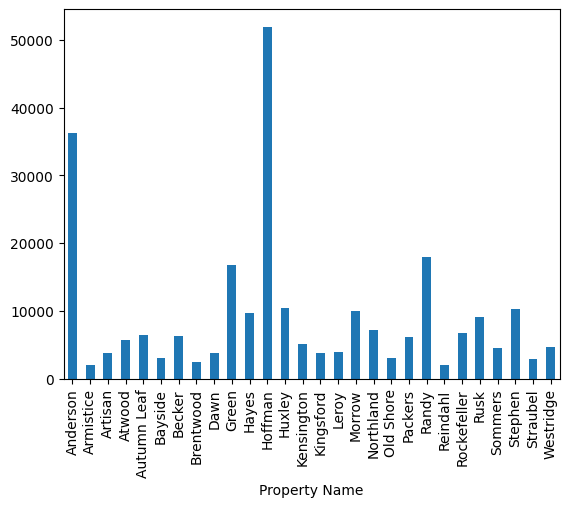

In [32]:
Office_Property.groupby('Property Name')['Occupied SqFt'].mean().plot(kind='bar')

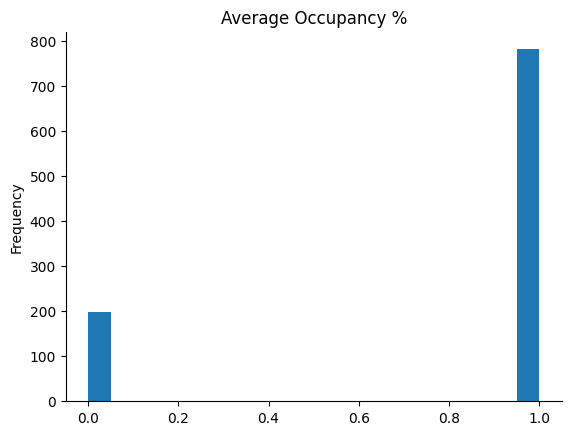

In [33]:
# Average Occupancy % count in Office Properties
Office_Property['Average Occupancy %'].plot(kind='hist', bins=20, title='Average Occupancy %')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Asset Manager'>

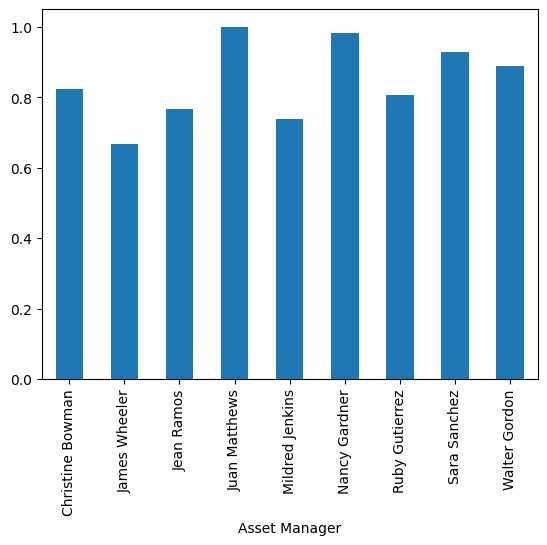

In [34]:
# Bar chart of average occupancy percentage by asset manager in office properties
Office_Property.groupby('Asset Manager')['Average Occupancy %'].mean().plot(kind='bar')

In [35]:
print(Office_Property.groupby('Asset Manager')['Average Occupancy %'].mean().sort_values(ascending=False))

Asset Manager
Juan Matthews       1.000000
Nancy Gardner       0.982456
Sara Sanchez        0.928571
Walter Gordon       0.890625
Christine Bowman    0.824859
Ruby Gutierrez      0.805882
Jean Ramos          0.766497
Mildred Jenkins     0.737705
James Wheeler       0.666667
Name: Average Occupancy %, dtype: float64


<Axes: xlabel='Property Name'>

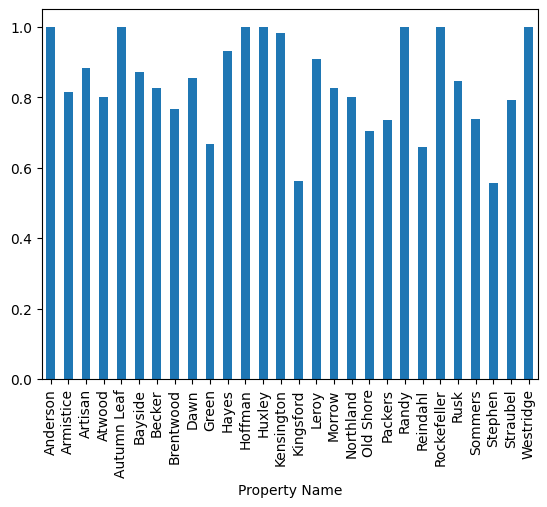

In [36]:
Office_Property.groupby('Property Name')['Average Occupancy %'].mean().plot(kind='bar')

In [37]:
print(Office_Property.groupby('Property Name')['Average Occupancy %'].mean().sort_values(ascending=False))

Property Name
Anderson       1.000000
Hoffman        1.000000
Rockefeller    1.000000
Randy          1.000000
Huxley         1.000000
Westridge      1.000000
Autumn Leaf    1.000000
Kensington     0.982456
Hayes          0.931034
Leroy          0.909091
Artisan        0.884615
Bayside        0.870968
Dawn           0.854167
Rusk           0.846154
Becker         0.827586
Morrow         0.827586
Armistice      0.814815
Atwood         0.800000
Northland      0.800000
Straubel       0.792453
Brentwood      0.767442
Sommers        0.737705
Packers        0.736842
Old Shore      0.704545
Green          0.666667
Reindahl       0.658537
Kingsford      0.563380
Stephen        0.555556
Name: Average Occupancy %, dtype: float64


<Axes: xlabel='Asset Manager'>

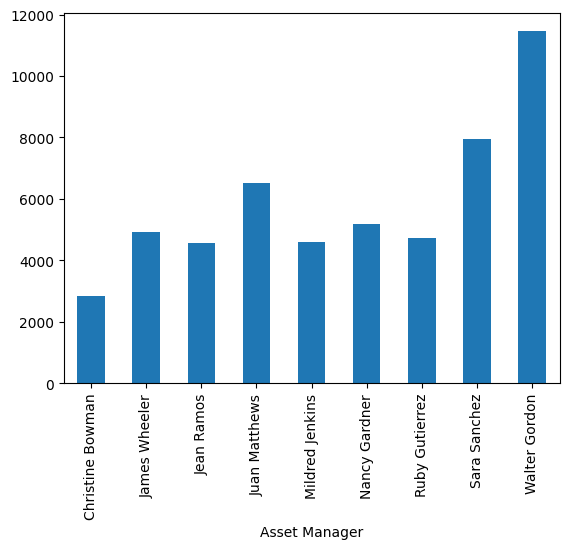

In [38]:
#Finding out how asset manager affects the at the total square footage occupied by tenants in Office  Properties
Office_Property.groupby('Asset Manager')['Occupied SqFt'].mean().plot(kind='bar')

#### Occupancy Analysis for Office Properties
*   Under Office Properties OldShore Property(51873) have the highest office properties followed closely by Hoffman Property while Anderson Property have the lowest ofice properties.
*   A large number of Office Properties have high Occupied SqFt.
*   Office Properties managed by Juan Matthews have the highest Occupied Rate while James Wheeler have the lowest Occupany Rate.
*   Anderson, Hoffman,Rockefeller,Randy, Huxley, Westridge and Autumn Leaf have the highest occupancy rate.



###Occupancy Analysis for Retail Properties

In [39]:
#Creating a dataframe for Retail Properties
Retail_Property = df[df['Property Type'] == 'Retail']  # Slicing the all columns of Property Row
Retail_Property.head()

,Asset Manager,Prop ID,Property Name,Property Type,Average Occupancy %,GLA Sq Ft,Gross Value,Occupied SqFt,Vacant Sq Ft
1199,Eric Jones,AA033,Moulton,Retail,0,1800,1.069122e+08,0,1800
1200,Eric Jones,AA033,Moulton,Retail,0,2000,1.069122e+08,0,2000
1201,Eric Jones,AA033,Moulton,Retail,0,4372,1.069122e+08,0,4372
1202,Eric Jones,AA033,Moulton,Retail,0,6850,1.069122e+08,0,6850
1203,Eric Jones,AA033,Moulton,Retail,1,825,1.069122e+08,825,0


In [40]:
print(Retail_Property.groupby('Property Name')['Occupied SqFt'].sum().sort_values(ascending=False))

Property Name
Moulton        285941
Darwin         245279
Sunnyside      187870
Raven          142387
Susan          129036
Arapahoe       121967
Acker           97364
Heath           96900
Dottie          85538
Sundown         82151
Butterfield     67992
Anhalt          63992
Name: Occupied SqFt, dtype: int64


<Axes: xlabel='Property Name'>

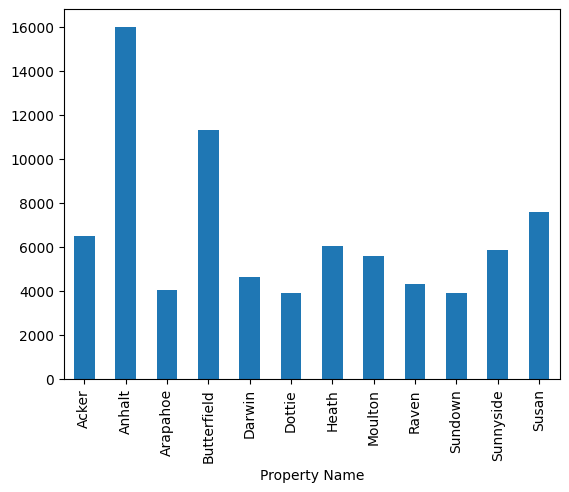

In [41]:
#Finding which property has the most occupied sqft
Retail_Property.groupby('Property Name')['Occupied SqFt'].mean().plot(kind='bar')

<Axes: xlabel='Asset Manager'>

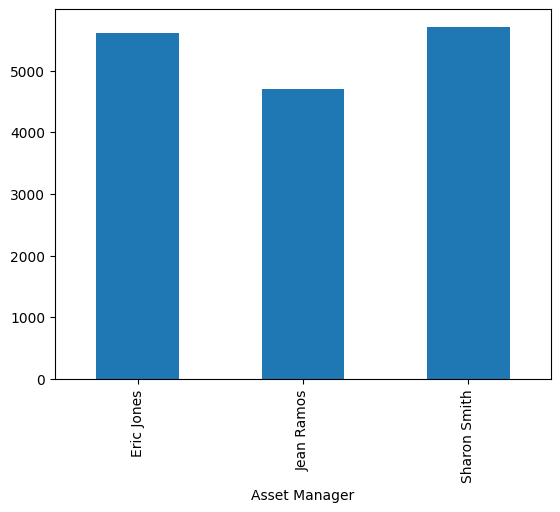

In [42]:
#Finding out how asset manager affects the at the total square footage occupied by tenants in Retail Properties
Retail_Property.groupby('Asset Manager')['Occupied SqFt'].mean().plot(kind='bar')

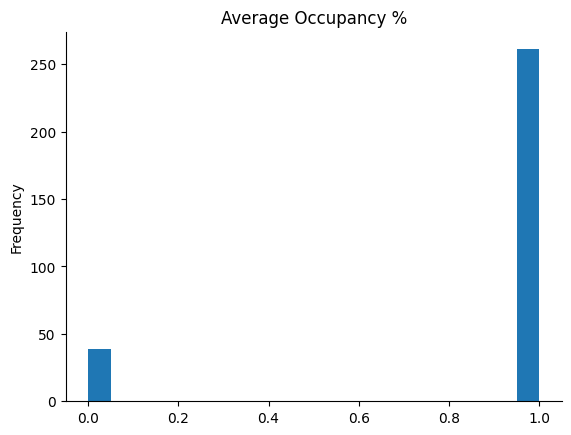

In [43]:
# Average Occupancy % count in Retail Properties
Retail_Property['Average Occupancy %'].plot(kind='hist', bins=20, title='Average Occupancy %')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Asset Manager'>

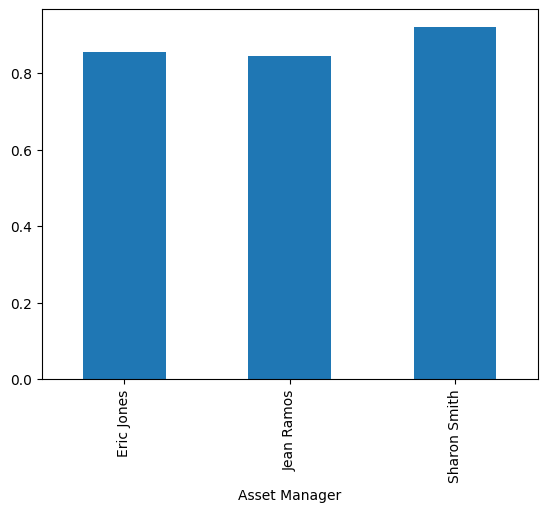

In [44]:
# Bar chart of average occupancy percentage by asset manager in Retail properties
Retail_Property.groupby('Asset Manager')['Average Occupancy %'].mean().plot(kind='bar')

In [45]:
print(Retail_Property.groupby('Asset Manager')['Average Occupancy %'].mean().sort_values(ascending=False))

Asset Manager
Sharon Smith    0.921053
Eric Jones      0.857143
Jean Ramos      0.846154
Name: Average Occupancy %, dtype: float64


<Axes: xlabel='Property Name'>

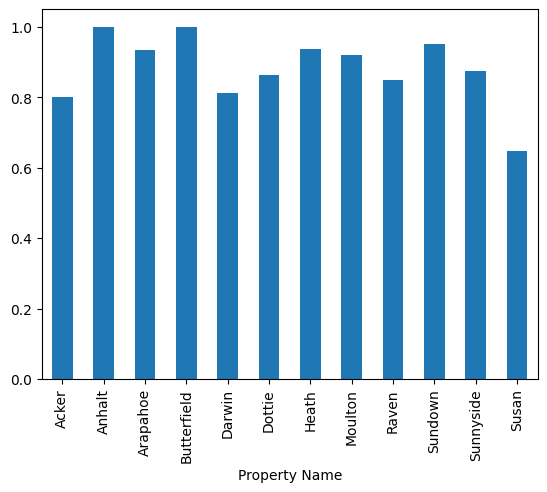

In [46]:
Retail_Property.groupby('Property Name')['Average Occupancy %'].mean().plot(kind='bar')

In [47]:
print(Retail_Property.groupby('Property Name')['Average Occupancy %'].mean().sort_values(ascending=False))

Property Name
Anhalt         1.000000
Butterfield    1.000000
Sundown        0.952381
Heath          0.937500
Arapahoe       0.933333
Moulton        0.921569
Sunnyside      0.875000
Dottie         0.863636
Raven          0.848485
Darwin         0.811321
Acker          0.800000
Susan          0.647059
Name: Average Occupancy %, dtype: float64


#### Occupancy Analysis for Retail Properties
*   Under the Retail Property Moulton (285941), Darwin(245279) have a high number of properties while Anhalt have the least number of properties.
*   Anhalt properties has the most Occupied SqFt while Arapahoe adn Dottie properties have the least of occupied sqft.
*   Under the Retail Properties, there are 3 Assets Mnagers(Eric Jones, Jean Ramos, Sharon Smith).
*   Jean Ramos manages properties with the least Occupied SqFt, while Sharon Smith manages properties with the most Occupied SqFt.
*  Concurrently, Sharon Smmith has the highest occupancy rates
*  Anhalt and ButterField Properties have a high occupancy rate while Susan Propety has the least occupancy rate.




### Occupancy Analysis for Industrial Properties

In [48]:
Industrial_Property = df[df['Property Type'] == 'Industrial']  # Slicing the all columns of Property Row
Industrial_Property.head()

,Asset Manager,Prop ID,Property Name,Property Type,Average Occupancy %,GLA Sq Ft,Gross Value,Occupied SqFt,Vacant Sq Ft
0,James Wheeler,AA048,Dovetail,Industrial,1,274821,5782021.54,274821,0
1,James Wheeler,AA048,Dovetail,Industrial,0,42403,9020265.50,0,42403
2,James Wheeler,AA048,Dovetail,Industrial,0,144500,9020265.50,0,144500
3,James Wheeler,AA048,Dovetail,Industrial,1,75365,9020265.50,75365,0
4,James Wheeler,AA048,Dovetail,Industrial,1,508171,23839170.28,508171,0


In [49]:
print(Industrial_Property.groupby('Property Name')['Occupied SqFt'].sum().sort_values(ascending=False))

Property Name
Dovetail         1127852
Thackeray         753170
Hansons           697052
Oakridge          434871
Heath             430972
Shoshone          423330
Corry             365359
Daystar           340756
Pearson           314855
Manufacturers     265058
Roxbury           257246
Milwaukee         234750
Ridgeway          198939
East              187270
Maple             169196
Gateway           159684
Delladonna        149120
Blaine            123058
Canary            104148
American          103831
Shopko             83520
Erie                   1
Name: Occupied SqFt, dtype: int64


<Axes: xlabel='Property Name'>

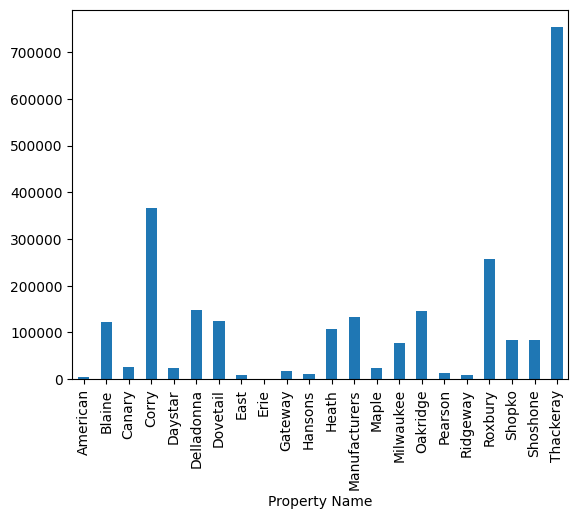

In [50]:
Industrial_Property.groupby('Property Name')['Occupied SqFt'].mean().plot(kind='bar')

<Axes: xlabel='Asset Manager'>

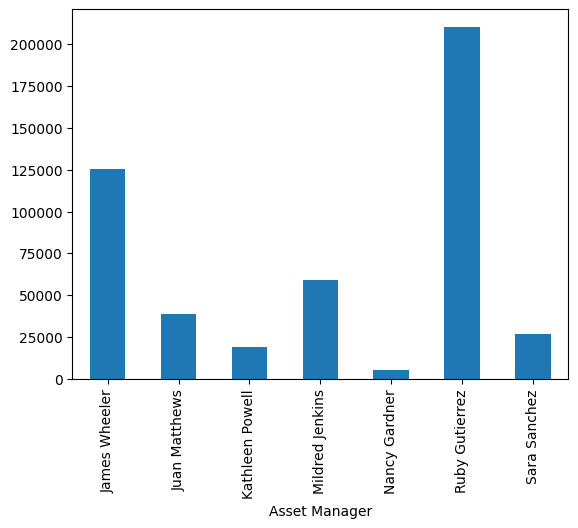

In [51]:

#Findig out how asset manager affects the at the total square footage occupied by tenants in Industrial Properties
Industrial_Property.groupby('Asset Manager')['Occupied SqFt'].mean().plot(kind='bar')

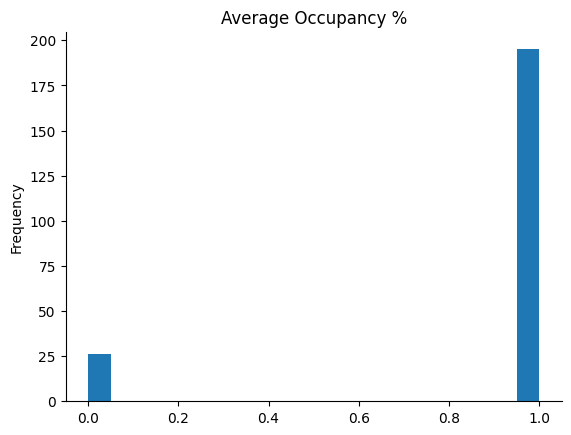

In [52]:
# Average Occupancy % count in Industrial Properties
Industrial_Property['Average Occupancy %'].plot(kind='hist', bins=20, title='Average Occupancy %')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Asset Manager'>

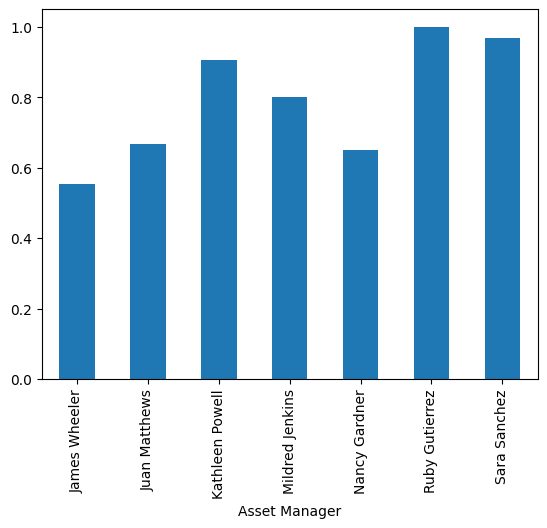

In [53]:
# Bar chart of average occupancy percentage by asset manager in Industrial properties
Industrial_Property.groupby('Asset Manager')['Average Occupancy %'].mean().plot(kind='bar')

In [54]:
print(Industrial_Property.groupby('Asset Manager')['Average Occupancy %'].mean().sort_values(ascending=False))

Asset Manager
Ruby Gutierrez     1.000000
Sara Sanchez       0.968085
Kathleen Powell    0.905405
Mildred Jenkins    0.800000
Juan Matthews      0.666667
Nancy Gardner      0.650000
James Wheeler      0.555556
Name: Average Occupancy %, dtype: float64


<Axes: xlabel='Property Name'>

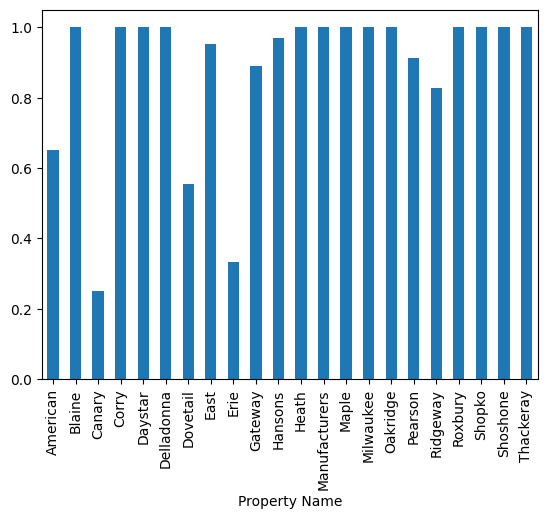

In [55]:
Industrial_Property.groupby('Property Name')['Average Occupancy %'].mean().plot(kind='bar')

In [56]:
print(Industrial_Property.groupby('Property Name')['Average Occupancy %'].mean().sort_values(ascending=False))

Property Name
Heath            1.000000
Blaine           1.000000
Shoshone         1.000000
Shopko           1.000000
Roxbury          1.000000
Oakridge         1.000000
Milwaukee        1.000000
Maple            1.000000
Manufacturers    1.000000
Thackeray        1.000000
Delladonna       1.000000
Daystar          1.000000
Corry            1.000000
Hansons          0.969231
East             0.952381
Pearson          0.913043
Gateway          0.888889
Ridgeway         0.826087
American         0.650000
Dovetail         0.555556
Erie             0.333333
Canary           0.250000
Name: Average Occupancy %, dtype: float64


#### Occupancy Analysis for Industrial Properties
*   DoveTail, Thackeray property have most occupied Sqft while Erie has the least occupied Sqft.
*  75% of Industrial Properties have a high Occupancy Rate while 25% have a low Occupancy Rate.
*   Ruby Guitierez manages properties with the most occupied SqFt while Nancy Gardner manages properties with the least occupied SqFt.
*   This is also transalates to Ruby Guitierez manages more properties with high Occupany Rates followed closely by Lara Sanchez while James Wheeler manages properties with low occupancy rates.
*   Heath, Blaine, Shoshone, Shopko,Roxbury,Oakridge,Milwaukee,Maple,Manufacturers,Thackeray,Delladonna,Daystar and Corry have a high Occupancy RateS.
*   List item



#SQUARE FOOTAGE ANALYSIS

<Axes: xlabel='Property Type'>

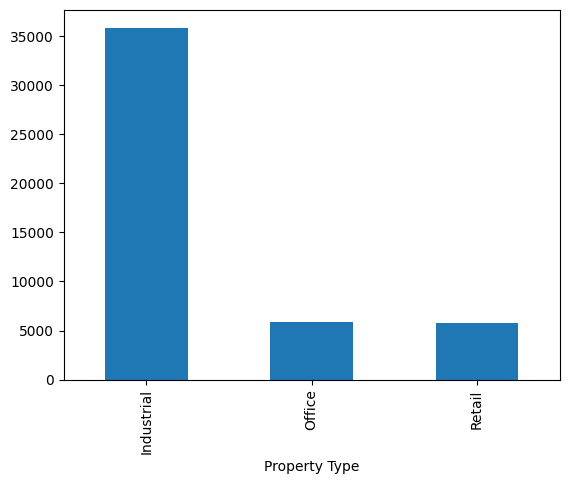

In [57]:
df.groupby('Property Type')['GLA Sq Ft'].mean().plot(kind='bar')

<Axes: xlabel='Property Type'>

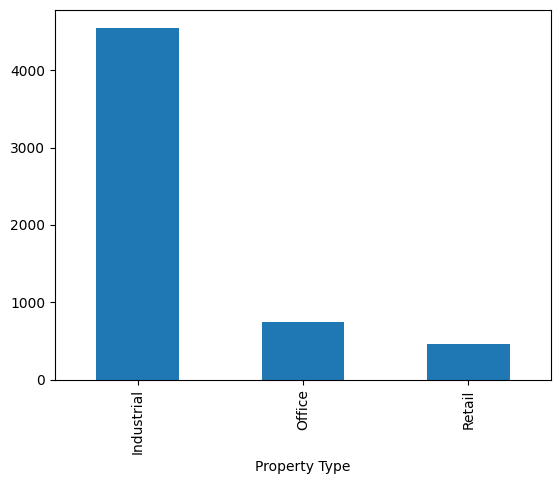

In [58]:
df.groupby('Property Type')['Vacant Sq Ft'].mean().plot(kind='bar')

###Evaluate the distribution of gross leasable area (GLA) across properties.

In [59]:
print(df.groupby('Property Type')['GLA Sq Ft'].mean().sort_values(ascending=False))

Property Type
Industrial    35881.855204
Office         5833.397751
Retail         5820.186667
Name: GLA Sq Ft, dtype: float64


<Axes: xlabel='Property Type'>

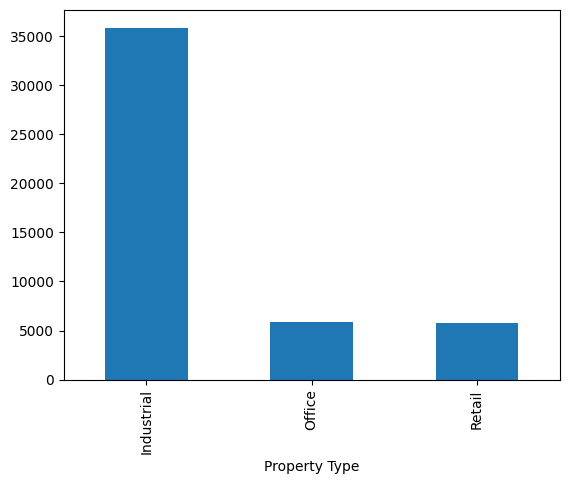

In [60]:
df.groupby('Property Type')['GLA Sq Ft'].mean().plot(kind='bar')

In [61]:
print(Office_Property.groupby('Property Name')['GLA Sq Ft'].mean().sort_values(ascending=False))

Property Name
Hoffman        51873.333333
Anderson       36192.000000
Green          21124.333333
Randy          17975.647059
Stephen        12872.222222
Morrow         10579.000000
Northland      10563.400000
Rusk           10501.230769
Huxley         10410.153846
Hayes          10145.965517
Becker          6934.896552
Rockefeller     6719.440000
Atwood          6699.250000
Autumn Leaf     6511.375000
Packers         6356.736842
Sommers         5647.983607
Kensington      5346.824561
Kingsford       5050.985915
Westridge       4672.071429
Leroy           4542.909091
Straubel        4266.132075
Old Shore       4167.916667
Artisan         4105.576923
Dawn            4046.270833
Bayside         3652.935484
Reindahl        2925.926829
Brentwood       2832.744186
Armistice       2350.679012
Name: GLA Sq Ft, dtype: float64


<Axes: xlabel='Property Name'>

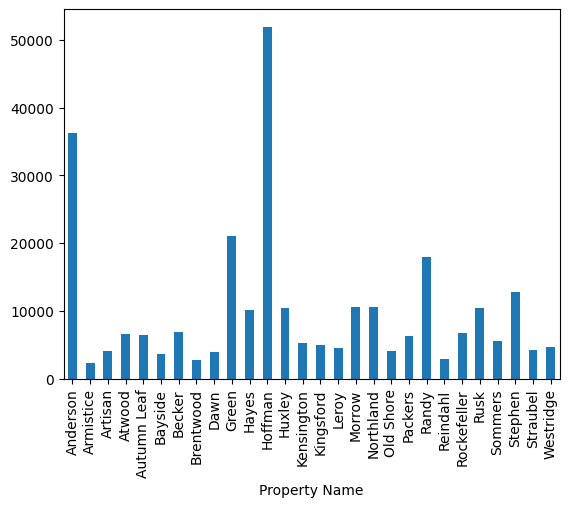

In [62]:
Office_Property.groupby('Property Name')['GLA Sq Ft'].mean().plot(kind='bar')

In [63]:
print(Industrial_Property.groupby('Property Name')['GLA Sq Ft'].mean().sort_values(ascending=False))

Property Name
Thackeray        753170.000000
Corry            365359.000000
Roxbury          257246.000000
Delladonna       149120.000000
Dovetail         148306.111111
Oakridge         144957.000000
Manufacturers    132529.000000
Blaine           123058.000000
Erie             119558.333333
Heath            107743.000000
Shoshone          84666.000000
Shopko            83520.000000
Canary            81356.000000
Milwaukee         78250.000000
Daystar           24339.714286
Maple             24170.857143
Gateway           21224.222222
Pearson           15493.695652
Ridgeway          11629.913043
Hansons           10963.769231
East               9034.000000
American           8170.500000
Name: GLA Sq Ft, dtype: float64


<Axes: xlabel='Property Name'>

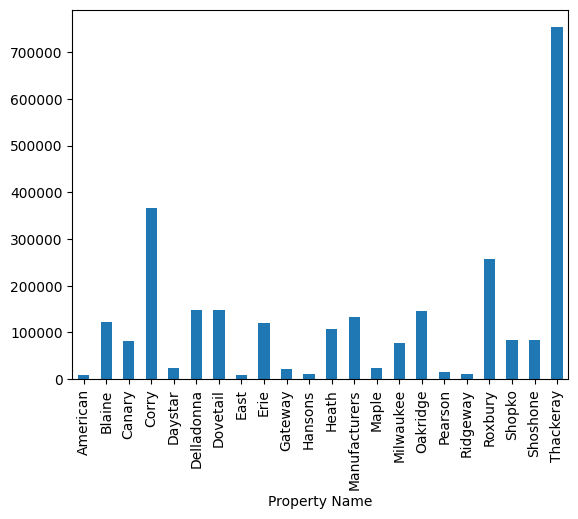

In [64]:
Industrial_Property.groupby('Property Name')['GLA Sq Ft'].mean().plot(kind='bar')

In [65]:
print(Retail_Property.groupby('Property Name')['GLA Sq Ft'].mean().sort_values(ascending=False))

Property Name
Anhalt         15998.000000
Butterfield    11332.000000
Susan           9912.882353
Acker           6817.733333
Sunnyside       6415.156250
Heath           6181.250000
Moulton         5901.235294
Darwin          5259.377358
Raven           4673.272727
Dottie          4379.181818
Arapahoe        4160.866667
Sundown         4000.285714
Name: GLA Sq Ft, dtype: float64


<Axes: xlabel='Property Name'>

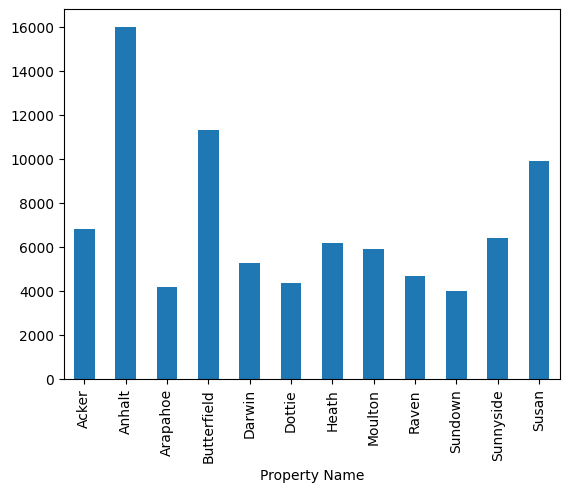

In [66]:
Retail_Property.groupby('Property Name')['GLA Sq Ft'].mean().plot(kind='bar')

###Analyse the ratio of occupied square footage to total GLA.

In [67]:
# Calculate total gross value for each property
Total_Gross_SQFt = df['GLA Sq Ft'].sum()
print(Total_Gross_SQFt)

15381009


In [68]:
# Calculating the ratio
df['Ratio'] = df['Occupied SqFt'] / Total_Gross_SQFt
print (df['Ratio'])

0       0.017868
1       0.000000
2       0.000000
3       0.004900
4       0.033039
          ...   
1494    0.000309
1495    0.000317
1496    0.000325
1497    0.000913
1498    0.000943
Name: Ratio, Length: 1499, dtype: float64


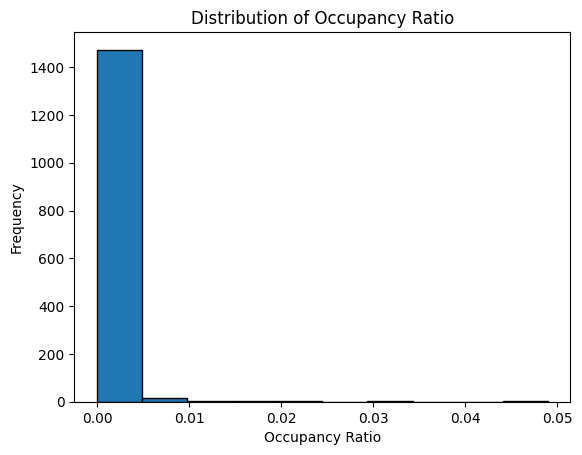

In [69]:
# Visualize the distribution of occupancy ratios
plt.hist(df['Ratio'], bins=10, edgecolor='black')
plt.xlabel('Occupancy Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Occupancy Ratio')
plt.show()

<Axes: xlabel='Prop ID', ylabel='Ratio'>

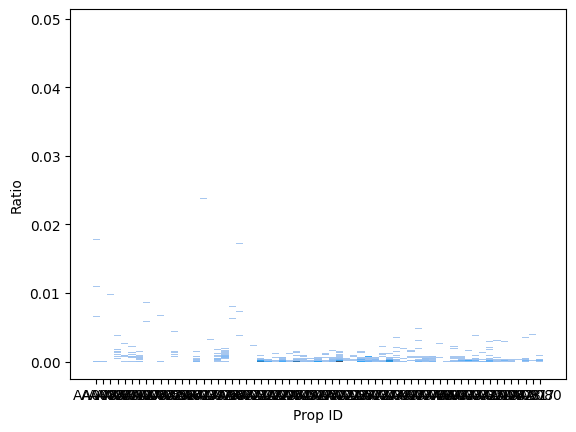

In [70]:
sns.histplot(x='Prop ID', y='Ratio', data=df)

In [71]:
# Analyze the occupancy ratios
mean_ratio = df['Ratio'].mean()
median_ratio = df['Ratio'].median()

In [72]:
print("Mean Occupancy Ratio:", mean_ratio)
print("Median Occupancy Ratio:", median_ratio)

Mean Occupancy Ratio: 0.0005857885317614346
Median Occupancy Ratio: 0.00016936470162653178


####Evaluating the distriution of gross leasable area(GLA) across the properties.
*   Industrial Properties have the highest gross leasable area(35881.9) while Retail Properties have the lowest gross leasable area(5020.0).
*   Office Properties- Hoffman property has the most Gross Leasable Area, while Armistice Property has the least.
*   Retail Properties- Anhalt property has the most Gross Leasable Area, while Sundown Property has the least.
*   Industrial Properties- Thackeray property has the most Gross Leasable Area, while American Property has the least.




#### Analysing the ratio of occupied square footage to Total GLA
*   The mean occupancy ratio is 0.0586% indicating low occupancy while the median has a ratio of 0.0169%Both the mean and median occupancy ratios are extremely low. This could indicate a few possible scenarios:
  - The properties in your dataset are largely vacant.




# PROPERTY VALUE ASSESSMENT

###Assess the relationship between occupancy rates, square footage, and property values.

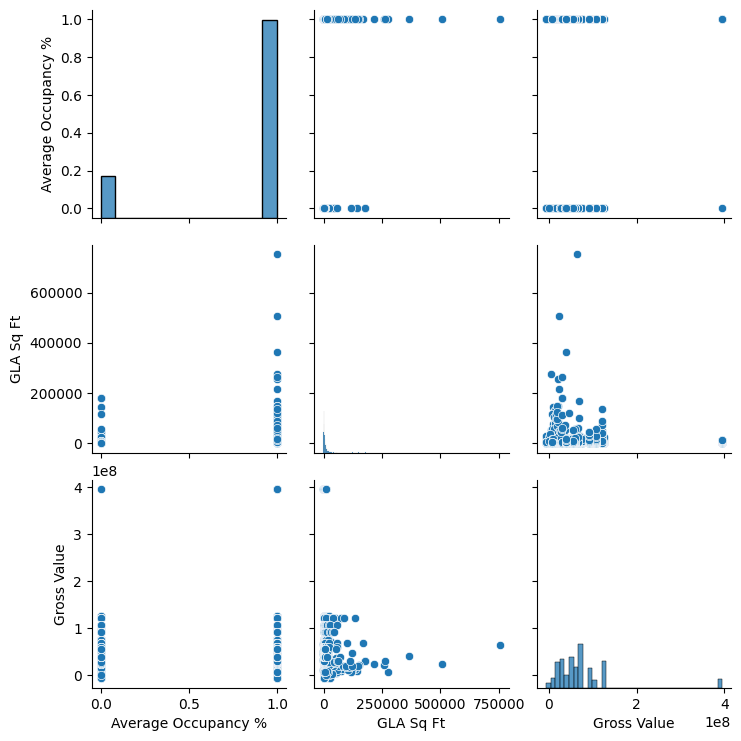

In [73]:
sns.pairplot(df[['Average Occupancy %', 'GLA Sq Ft', 'Gross Value']])
plt.show()

###Identify properties with high potential for value appreciation based on occupancy and square footage metrics.

In [74]:
#Defination of criteria
#Average occupancy should be equal to 100%
#Gross leasable area should be greater than 32822.794543

In [75]:
Criteria = (df['Average Occupancy %'] == 1) & (df['GLA Sq Ft'] > 32822.794543)
#Criteria = (df['GLA Sq Ft'] > 32822.794543)

In [76]:
# Filter properties based on criteria
high_value_properties = df[Criteria]

In [77]:
print(high_value_properties)

      Asset Manager Prop ID Property Name Property Type  Average Occupancy %  \
0     James Wheeler   AA048      Dovetail    Industrial                    1   
3     James Wheeler   AA048      Dovetail    Industrial                    1   
4     James Wheeler   AA048      Dovetail    Industrial                    1   
7     James Wheeler   AA048      Dovetail    Industrial                    1   
8     James Wheeler   AA048      Dovetail    Industrial                    1   
...             ...     ...           ...           ...                  ...   
1422     Jean Ramos   AA024         Heath        Retail                    1   
1437   Sharon Smith   AA082         Acker        Retail                    1   
1441   Sharon Smith   AA078        Anhalt        Retail                    1   
1471   Sharon Smith   AA081      Arapahoe        Retail                    1   
1477   Sharon Smith   AA077   Butterfield        Retail                    1   

      GLA Sq Ft  Gross Value  Occupied 

<Axes: xlabel='Property Type'>

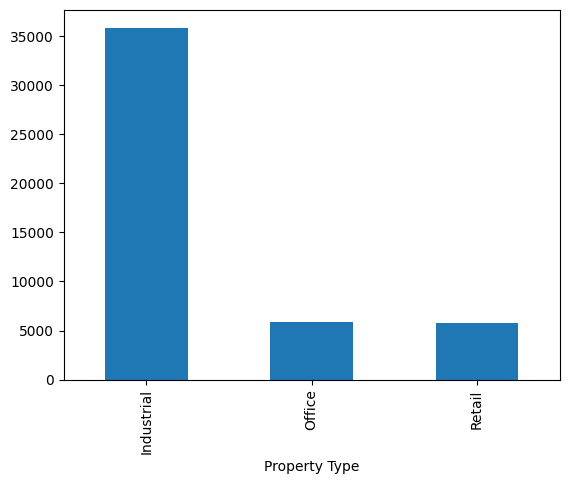

In [78]:
df.groupby('Property Type')['GLA Sq Ft'].mean().plot(kind='bar')

In [79]:
# Rank properties based on potential for value appreciation
high_value_properties['potential_rank'] = high_value_properties['Average Occupancy %'] * high_value_properties['GLA Sq Ft']


<ipython-input-79-74c0924e6328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_properties['potential_rank'] = high_value_properties['Average Occupancy %'] * high_value_properties['GLA Sq Ft']


In [80]:
# Sort properties by potential rank
high_value_properties_sorted = high_value_properties.sort_values(by='potential_rank', ascending=False)


In [81]:
print(high_value_properties_sorted)

        Asset Manager Prop ID Property Name Property Type  \
220      Sara Sanchez   AA071     Thackeray    Industrial   
4       James Wheeler   AA048      Dovetail    Industrial   
124    Ruby Gutierrez   AA039         Corry    Industrial   
0       James Wheeler   AA048      Dovetail    Industrial   
219      Sara Sanchez   AA072      Oakridge    Industrial   
...               ...     ...           ...           ...   
1173    Walter Gordon   AA005     Northland        Office   
1172    Walter Gordon   AA005     Northland        Office   
1198    Walter Gordon   AA003   Rockefeller        Office   
940    Ruby Gutierrez   AA044        Atwood        Office   
60    Kathleen Powell   AA011       Pearson    Industrial   

      Average Occupancy %  GLA Sq Ft  Gross Value  Occupied SqFt  \
220                     1     753170  64234323.61         753170   
4                       1     508171  23839170.28         508171   
124                     1     365359  39632431.10         36535

<Axes: xlabel='Property Name'>

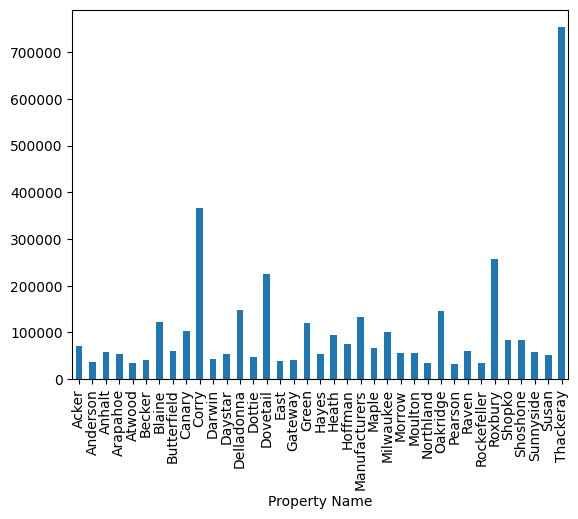

In [82]:
high_value_properties_sorted.groupby('Property Name')['GLA Sq Ft'].mean().plot(kind='bar')

#### Identify properties with high potential for valuee appreciation based on occupancy and square footage metrics.
*   Thackeray Propety has the highest potential for value appreciation.
*   Followed closely by Corry Property.
*   While Anderson Propertyx, Atwood Property,Pearson Property and Rockefeller Property have lower potential for value appreciation.






#MACHINE LEARNING MODE;

### Feature Engieering

In [83]:
#Encoding the Propery Type and Asset Manager column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Property Type']=label_encoder.fit_transform(df['Property Type'])
df['Asset Manager']=label_encoder.fit_transform(df['Asset Manager'])
print(df ['Property Type'].unique())
print(df ['Asset Manager'].unique())

[0 1 2]
[ 2  4  5  6  7  8  9  0  3 11  1 10]


In [84]:
df['Property Type'].value_counts()

Property Type
1    978
2    300
0    221
Name: count, dtype: int64

In [85]:
df['Asset Manager'].value_counts()

Asset Manager
3     288
2     183
0     177
8     173
9     164
1     133
7      77
6      76
10     76
5      74
11     64
4      14
Name: count, dtype: int64

In [86]:
df = df.drop(columns='Prop ID')


In [87]:
df = df.drop(columns=['Property Name'], axis=1)

*   Encoding of categorical columns the Property Type and Asset Manger
*   Dropping of the Prop ID and Property Name Column are droppped

### Separating the Features and Targets



In [88]:
X = df.drop(columns='Average Occupancy %', axis=1)
Y = df['Average Occupancy %']

In [89]:
print(X)

      Asset Manager  Property Type  GLA Sq Ft  Gross Value  Occupied SqFt  \
0                 2              0     274821   5782021.54         274821   
1                 2              0      42403   9020265.50              0   
2                 2              0     144500   9020265.50              0   
3                 2              0      75365   9020265.50          75365   
4                 2              0     508171  23839170.28         508171   
...             ...            ...        ...          ...            ...   
1494             10              2       4752  38950240.94           4752   
1495             10              2       4871  38950240.94           4871   
1496             10              2       5000  38950240.94           5000   
1497             10              2      14048  38950240.94          14048   
1498             10              2      14500  38950240.94          14500   

      Vacant Sq Ft     Ratio  
0                0  0.017868  
1            

Average Occupancy Rate is the target column while the rest of the columns are features.

## DECISION TREE CLASSIFIER

With gini index

In [90]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

### Splitting data into separate training and test sets

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [92]:
print(X.shape, X_train.shape, X_test.shape)

(1499, 7) (1199, 7) (300, 7)


In [93]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [94]:
Y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


### Checking overfitiing and underfitting


In [97]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


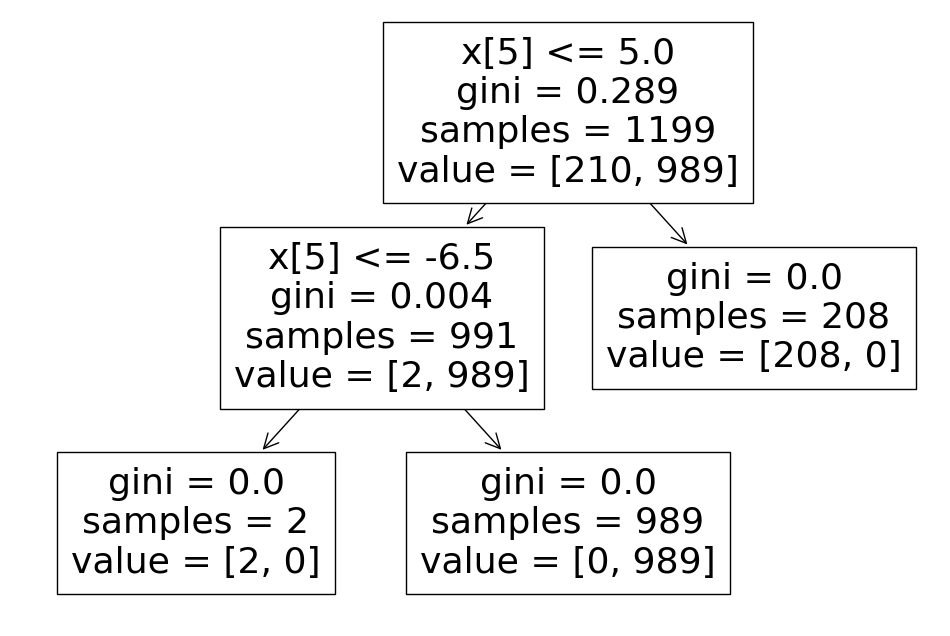

In [98]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, Y_train));

With criterion entropy

In [99]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test Set results with criterion entropy

In [100]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [101]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


### Check overfitting and underfitting

In [102]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [103]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       248

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



1.  We build a Decision-Tree Classifier model to predict the average occupancy. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 1.0.
2.	In the model with criterion `gini index`, the training-set accuracy score is 1.0 while the test-set accuracy to be 1.0. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 1.0 while the test-set accuracy to be 1.0.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same.
5.	The classification report yields very good model performance.

In [104]:
#Creation of a pickle file
import pickle


In [105]:
with open ('DecisionTreeClassifier_pickle', 'wb') as file:
  pickle.dump(clf_en, file)

# RANDOM FOREST CLASSIFIER

In [106]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, Y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 1.0000


In [124]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00       248

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



*   We use Random Forest Classifier to Predict average Ocuupancy rate with 100 decision trees.
*   The model accuracy with 100 decisionn trees is 1.00
*   The classification report yields very good model performance.




In [107]:
#Creation of a pickle file
import pickle

In [108]:
with open ('RandomForestClassifier_pickle', 'wb') as file:
  pickle.dump(rfc_100, file)

## Find the most important features

In [109]:
# create the classifier with n_estimators = 10
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [110]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores


Occupied SqFt    0.340603
Vacant Sq Ft     0.339205
Ratio            0.294660
GLA Sq Ft        0.016540
Asset Manager    0.004825
Gross Value      0.003923
Property Type    0.000244
dtype: float64

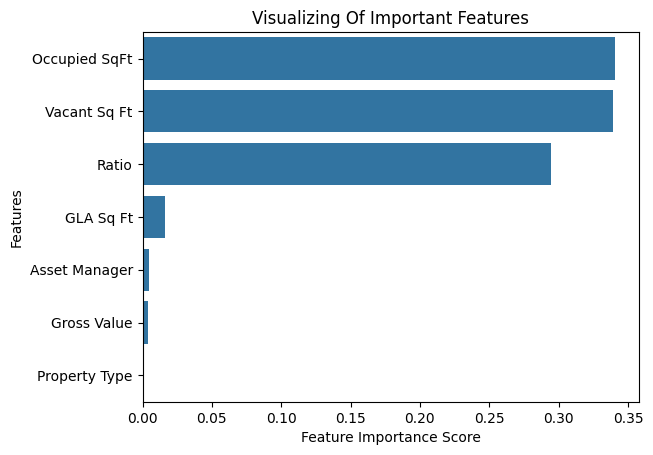

<Figure size 640x480 with 0 Axes>

In [111]:
# Select the top 10 features
top_10_features = feature_scores.nlargest(10)

# Create a bar plot
sns.barplot(x=top_10_features, y=top_10_features.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Of Important Features")

# Visualize the graph
plt.show()

# Save the figure
plt.savefig('Visualisation_of_Important_Features.png')

We see the important feature is Occupied SqFt and Vacant SqFt in determining the Average Occupancy.

#LOGISTIC REGRESSION


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression()

In [114]:
#Training the Logistic Regression model using Training data

model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation
#### Accuracy Score

In [115]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [116]:
print('Accuracy on training data : ', train_data_accuracy)

Accuracy on training data :  0.9974979149291076


In [117]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [118]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  1.0


I perform accuracy scores in both training and test data to check on overfitting and underfitting.


*   We use Logistic Regression to Predict average Ocuupancy Rate.
*   The model accuracy is 1.00
*   We use accuracy score to evaluate the model and it yield good performance.

## Creating a predictive statement

In [119]:
input_data = (3,2,1,274821,5782021.54,274821,0)
#Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

Prediction = model.predict(input_data_reshaped)

print(Prediction)

if (Prediction[0] == 0):
  print('Has zero average occupancy')

else:
  print('Has a a hundred percent average occupancy')

[1]
Has a a hundred percent average occupancy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We create a predictive system using logistic regression and it clearly passes the test predicting the right result

In [120]:
# Creation of a pickle file
import pickle

In [121]:
with open('logisticregression_model.pkl', 'wb') as f:
  pickle.dump(model, f)